In [1]:
import numpy as np
import cv2
import tensorflow as tf
import os
import glob
import random
import matplotlib.pyplot as plt
os.environ['CUDA_VISIBLE_DEVICES']=''

/home/deeplearning/anaconda2/envs/py27_tf/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
path_list = glob.glob('dataset/*.jpg')

In [3]:
batch_image = np.zeros((10,256,256,3),np.uint8)

In [5]:
for i in xrange(10):
    batch_image[i,:,:,:] = cv2.imread(path_list[i])

In [127]:
def image_augment(input_image):
    out_image = input_image
    out_image = tf.image.random_brightness(input_image    , 0.3       )
    out_image = tf.image.random_contrast(out_image        , 0.3, 1.3  )
    out_image = tf.image.random_hue(out_image             , 0.2       )
    out_image = tf.image.random_saturation(out_image      , 0.7, 1.3  )
    out_image = tf.image.random_flip_left_right(out_image)
    out_image = tf.image.random_flip_up_down(out_image)
    out_image = tf.contrib.image.rotate(out_image         , tf.random_uniform((1,1),-20,20)[0]*0.01744446  )
    
    # Shear
    def sheer_image(input):
            pts1 = np.float32([[5,5],[20,5],[5,20]])
            shear_range = 5

            pt1 = 5+shear_range*np.random.uniform()-shear_range/2
            pt2 = 20+shear_range*np.random.uniform()-shear_range/2

            pts2 = np.float32([[pt1,5],[pt2,pt1],[5,pt2]])
            shear_M = cv2.getAffineTransform(pts1,pts2)

            para = np.zeros((8,),np.float32)
            para[0] = shear_M[0,0]
            para[1] = shear_M[0,1]
            para[2] = shear_M[0,2]
            para[3] = shear_M[1,0]
            para[4] = shear_M[1,1]
            para[5] = shear_M[1,2]

            return para
    
    para_t = tf.py_func(sheer_image,[0], tf.float32)
    out_image = tf.contrib.image.transform(out_image, tf.reshape(para_t,(8,)))
    
    return out_image

In [128]:
sess = tf.Session()

In [129]:
batch_image_tensor = tf.constant(batch_image)

In [130]:
aug_image = image_augment(batch_image_tensor[0])

scope: random_flip_left_right_1/
result name: random_flip_left_right_1/Merge:0


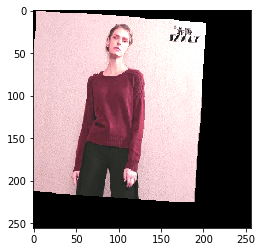

In [148]:
result_image = sess.run(aug_image)
plt.imshow(result_image[:,:,::-1])